In [1]:
import tensorflow as tf
tf.random.set_seed(0)

from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow import keras
from tensorflow.keras import layers, datasets, models, Input
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
import os
import numpy as np
np.random.seed(0)

import matplotlib.pyplot as plt

import random
random.seed(0)

In [2]:
def read_data(filepath):
    dataset = image_dataset_from_directory(
        filepath,
        image_size=(224, 224),
        batch_size=32,
        label_mode='int'
    )
    
    images = []
    labels = []
    for image_batch, label_batch in dataset:
        images.append(image_batch.numpy())
        labels.append(label_batch.numpy())
    
    # Chuyển đổi danh sách thành mảng numpy bằng cách dùng np.concatenate
    X = np.concatenate(images, axis=0).astype(np.uint8)
    y = np.concatenate(labels, axis=0).astype(np.uint8)
    
    return X, y

In [3]:
classes = ["apple", "avocado", "banana", "cherry", "kiwi", "mango", "orange", "pinenaple", "strawberries", "watermelon"]
len(classes)

10

In [4]:
X, y = read_data('train')
X_test, y_test = read_data('test')

Found 2301 files belonging to 10 classes.
Found 1025 files belonging to 10 classes.


In [5]:
X.shape, y.shape, X_test.shape, y_test.shape

((2301, 224, 224, 3), (2301,), (1025, 224, 224, 3), (1025,))

In [6]:
X = X.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255

In [7]:
y = keras.utils.to_categorical(y)
y_test = keras.utils.to_categorical(y_test)

In [8]:
X_val, y_val = X[1900:2301,:, :], y[1900:2301,:]
X_train, y_train = X[:1900, :, :], y[:1900, :]

In [9]:
# Xây dựng model
input_tensor = Input(shape = (224, 224, 3))
x = Conv2D(32, 3, activation = 'relu')(input_tensor)
x = Conv2D(32, 3, activation = 'relu')(x)

x = MaxPooling2D(2)(x)
x = Flatten()(x)

# FC
x = Dense(128, activation='relu')(x)
# x = layers.Dropout(0.5)(x)
x = Dense(10, activation='softmax')(x)

model = models.Model(inputs = input_tensor, outputs = x)

In [10]:
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
H = model.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 32, epochs = 10, verbose=1)

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 43s 708ms/step - accuracy: 0.1002 - loss: 10.6835 - val_accuracy: 0.1322 - val_loss: 2.2897
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 43s 721ms/step - accuracy: 0.2065 - loss: 2.1905 - val_accuracy: 0.2693 - val_loss: 2.0266
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 43s 716ms/step - accuracy: 0.4447 - loss: 1.6048 - val_accuracy: 0.2993 - val_loss: 1.9416
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 43s 710ms/step - accuracy: 0.8242 - loss: 0.6941 - val_accuracy: 0.3516 - val_loss: 2.7020
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 43s 719ms/step - accuracy: 0.9108 - loss: 0.2948 - val_accuracy: 0.3367 - val_loss: 3.8406
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 43s 712ms/step - accuracy: 0.9514 - loss: 0.1937 - val_accuracy: 0.3441 - val_loss: 2.9620
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 42s 702ms/step - accuracy: 0.9824 - loss: 0.0836 - val_accuracy: 0.3342 - val_loss: 3.3973
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 43s 716ms/step - accuracy: 0.9953 - loss: 0.0351 - val_acc

In [12]:
score = model.evaluate(X_test, y_test)

33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.3771 - loss: 3.9145


In [13]:
score

[3.8058650493621826, 0.383414626121521]

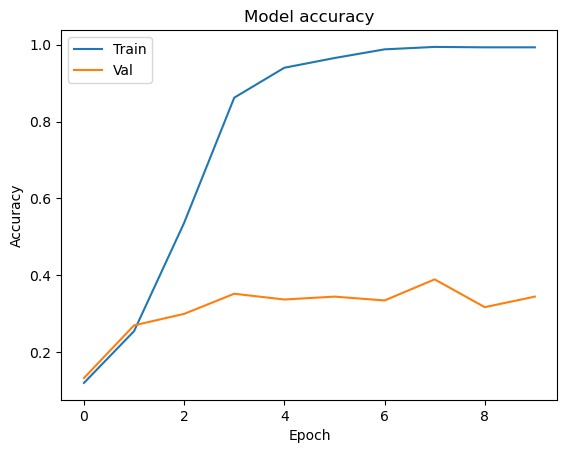

In [14]:
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [15]:
image_paths = [os.path.join('predict/', f) for f in os.listdir('predict/') if f.endswith(".jpeg")]

# Đọc ảnh thành tensor
def read_image(path):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)  # Giải mã ảnh JPEG thành tensor 3 kênh (RGB)
    image = tf.image.resize(image, (224, 224))  # Thay đổi kích thước ảnh (tùy chọn)
    image = tf.cast(image, tf.float32) / 255.0  # Chuẩn hóa giá trị pixel
    return image

# Tạo tập dữ liệu tensor
dataset = tf.data.Dataset.from_tensor_slices(image_paths)
dataset = dataset.map(read_image)

# Chuyển đổi tập dữ liệu thành numpy array
X_predict = []
for image_tensor in dataset:
    X_predict.append(image_tensor.numpy())
    
X_predict = np.array(X_predict)

In [16]:
y_predict = model.predict(X_predict)
predicted_classes = np.argmax(y_predict, axis=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


In [17]:
def plot_data(x_data: np.ndarray, y_data: np.ndarray) -> None:
    nrows, ncols = 2, 4
    fig, axes = plt.subplots(nrows, ncols, figsize=(8, 4))
    
    len_x = x_data.shape[0]
    
    for i in range(nrows * ncols):
        ax = axes[i // ncols, i % ncols]
        
        img_index = random.randint(0, len_x)
        
        ax.imshow(x_data[img_index])
        ax.set(xticks=[], yticks=[])
        
        true_label_str = 'Dự đoán: ' + classes[y_data[img_index]]
        ax.set_xlabel(true_label_str, color='green', fontsize = 12)
    plt.tight_layout()
    plt.show()

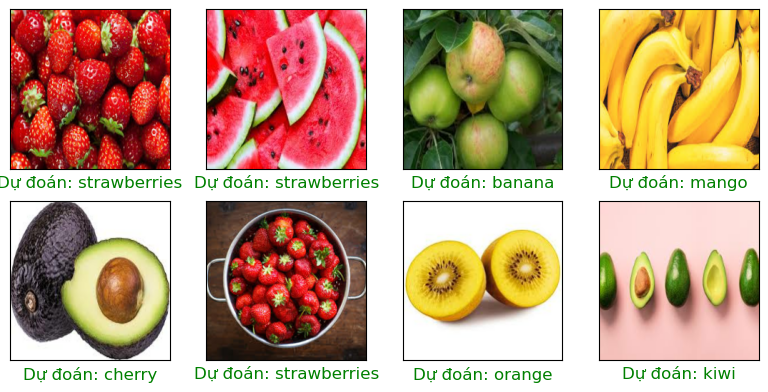

In [18]:
plot_data(X_predict, predicted_classes)